# Notes for myself
1. Stem and unigram DEFINENTLY IS BETTER -> 81%
2. I Should add all they variations of stem/lem
3. Having a thesaurus of words would greatyl help. Dry/Evaporate for example are the same. It would be really cool to allow a teacher to add in these words. Def an area for improvement

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# 

data = pd.read_csv(
    '../data/feature_sets/question100data.csv'
)
doc = pd.read_csv(
    '../data/feature_sets/question100doc.csv'
)

# data = pd.read_csv(
#     '../data/feature_sets/question0data.csv'
# )
# doc = pd.read_csv(
#     '../data/feature_sets/question0doc.csv'
# )

# data = pd.read_csv(
#     '../data/feature_sets/question21data.csv'
# )
# doc = pd.read_csv(
#     '../data/feature_sets/question21doc.csv'
# )

In [9]:
data.head()

,wordcount,stem_g_similarity,stem_j_similarity,stem_c_similarity,stem_ordered_g_similarity,stem_ordered_j_similarity,stem_ordered_c_similarity,q_stemmed_has_standard,q_stemmed_has_comparison,q_stemmed_has_determin,q_stemmed_has_chang,q_stemmed_has_variabl,q_stemmed_has_result,q_stemmed_has_standard_comparison,q_stemmed_has_comparison_determin,q_stemmed_has_determin_chang,q_stemmed_has_chang_variabl,q_stemmed_has_variabl_chang,q_stemmed_has_chang_result,q_stemmed_has_standard_comparison_determin,q_stemmed_has_comparison_determin_chang,q_stemmed_has_determin_chang_variabl,q_stemmed_has_chang_variabl_chang,q_stemmed_has_variabl_chang_result,q_stem_ordered_has_chang,q_stem_ordered_has_comparison,q_stem_ordered_has_determin,q_stem_ordered_has_result,q_stem_ordered_has_standard,q_stem_ordered_has_variabl,q_stem_ordered_has_chang_chang,q_stem_ordered_has_chang_comparison,q_stem_ordered_has_comparison_determin,q_stem_ordered_has_determin_result,q_stem_ordered_has_result_standard,q_stem_ordered_has_standard_variabl,q_stem_ordered_has_chang_chang_comparison,q_stem_ordered_has_chang_comparison_determin,q_stem_ordered_has_comparison_determin_result,q_stem_ordered_has_determin_result_standard,q_stem_ordered_has_result_standard_variabl
0,0.125,0.285714,0.142857,0.2887,0.285714,0.142857,0.2887,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0.500,0.625000,0.375000,0.5477,0.625000,0.375000,0.5477,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0.500,0.500000,0.100000,0.1826,0.500000,0.100000,0.1826,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0.875,0.666667,0.333333,0.5000,0.666667,0.333333,0.5000,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,0.250,0.333333,0.000000,0.0000,0.333333,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
from ClusteringNLP import Clustering_NLP
nlp = Clustering_NLP(data, doc)
nlp.correct_cluster_labels()
# print(nlp.accuracy())
# print(nlp.balanced_accuracy())
# print(nlp.f1_scorer())
# print(nlp.recall())
# print(nlp.precision())
nlp.kappa("quadratic")
# nlp.kappa("linear")


0.5904059040590406

In [12]:
confusion_matrix(nlp.doc['label'], nlp.doc.cluster)

array([[24,  4],
       [ 2,  7]], dtype=int64)

In [5]:
Answer = 'Both solutions are saturated (as indicated by)'
nlp.group_new_answer(Answer)
nlp.score_new_sentences(nlp.new_answers.iloc[:, 7:])

In [6]:
nlp.new_answers

,student_answer,teacher_answer,q_answer,q_stopwords,q_stemmed,q_stem_ordered,cluster,wordcount,stem_g_similarity,stem_j_similarity,stem_c_similarity,stem_ordered_g_similarity,stem_ordered_j_similarity,stem_ordered_c_similarity,q_stemmed_has_standard,q_stemmed_has_comparison,q_stemmed_has_determin,q_stemmed_has_chang,q_stemmed_has_variabl,q_stemmed_has_result,q_stemmed_has_standard_comparison,q_stemmed_has_comparison_determin,q_stemmed_has_determin_chang,q_stemmed_has_chang_variabl,q_stemmed_has_variabl_chang,q_stemmed_has_chang_result,q_stemmed_has_standard_comparison_determin,q_stemmed_has_comparison_determin_chang,q_stemmed_has_determin_chang_variabl,q_stemmed_has_chang_variabl_chang,q_stemmed_has_variabl_chang_result,q_stem_ordered_has_chang,q_stem_ordered_has_comparison,q_stem_ordered_has_determin,q_stem_ordered_has_result,q_stem_ordered_has_standard,q_stem_ordered_has_variabl,q_stem_ordered_has_chang_chang,q_stem_ordered_has_chang_comparison,q_stem_ordered_has_comparison_determin,q_stem_ordered_has_determin_result,q_stem_ordered_has_result_standard,q_stem_ordered_has_standard_variabl,q_stem_ordered_has_chang_chang_comparison,q_stem_ordered_has_chang_comparison_determin,q_stem_ordered_has_comparison_determin_result,q_stem_ordered_has_determin_result_standard,q_stem_ordered_has_result_standard_variabl
0,Both solutions are saturated (as indicated by),A standard is used for comparison to determine...,Both solutions are saturated (as indicated by),solutions saturated indicated,solut satur indic,indic satur solut,0,0.115385,0.333333,0.0,0.0,0.333333,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Visualization

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
pca = PCA(n_components = 2)
comps = pca.fit_transform(nlp.data)
clf = KMeans(2).fit(comps)
clf.cluster_centers_

array([[-0.65494316,  0.20660211],
       [ 1.54804746, -0.48833227]])

In [66]:
test = nlp.data.copy()
test.head()
centroids = nlp.model.cluster_centers_

test.append(pd.DataFrame(centroids, columns = test.columns))

,wordcount,stem_g_similarity,stem_j_similarity,stem_c_similarity,stem_ordered_g_similarity,stem_ordered_j_similarity,stem_ordered_c_similarity,q_stemmed_has_standard,q_stemmed_has_comparison,q_stemmed_has_determin,q_stemmed_has_chang,q_stemmed_has_variabl,q_stemmed_has_result,q_stemmed_has_standard_comparison,q_stemmed_has_comparison_determin,q_stemmed_has_determin_chang,q_stemmed_has_chang_variabl,q_stemmed_has_variabl_chang,q_stemmed_has_chang_result,q_stemmed_has_standard_comparison_determin,q_stemmed_has_comparison_determin_chang,q_stemmed_has_determin_chang_variabl,q_stemmed_has_chang_variabl_chang,q_stemmed_has_variabl_chang_result,q_stem_ordered_has_chang,q_stem_ordered_has_comparison,q_stem_ordered_has_determin,q_stem_ordered_has_result,q_stem_ordered_has_standard,q_stem_ordered_has_variabl,q_stem_ordered_has_chang_chang,q_stem_ordered_has_chang_comparison,q_stem_ordered_has_comparison_determin,q_stem_ordered_has_determin_result,q_stem_ordered_has_result_standard,q_stem_ordered_has_standard_variabl,q_stem_ordered_has_chang_chang_comparison,q_stem_ordered_has_chang_comparison_determin,q_stem_ordered_has_comparison_determin_result,q_stem_ordered_has_determin_result_standard,q_stem_ordered_has_result_standard_variabl
0,0.125000,0.285714,0.142857,0.288700,0.285714,0.142857,0.288700,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.500000,0.625000,0.375000,0.547700,0.625000,0.375000,0.547700,0.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.500000,0.500000,0.100000,0.182600,0.500000,0.100000,0.182600,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.875000,0.666667,0.333333,0.500000,0.666667,0.333333,0.500000,1.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.250000,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,0.375000,0.500000,0.250000,0.408200,0.500000,0.250000,0.408200,0.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+

In [60]:
data = TSNE(2,perplexity = 15).fit_transform(nlp.data)
clf = KMeans(2).fit(data)
clf.cluster_centers_

array([[-93.76243 , -46.16707 ],
       [ 51.60908 ,  22.991774]], dtype=float32)

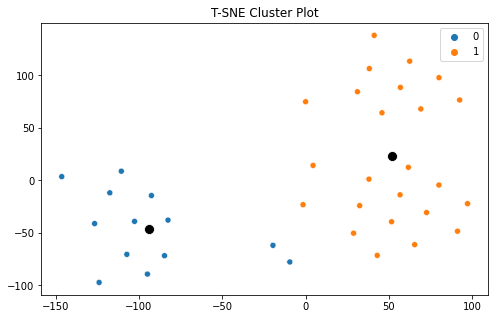

In [61]:
plt.figure(figsize = (8, 5))
sns.scatterplot(
    x = data[:,0],
    y = data[:,1],
    hue= clf.labels_,
)
sns.scatterplot(
    x = clf.cluster_centers_[:,0],
    y = clf.cluster_centers_[:,1],
    color  = 'black',
    s= 100,
    palette = ['black']
)
plt.title("T-SNE Cluster Plot")
plt.show()

<AxesSubplot:title={'center':'Reduced Dimension Cluster Plot'}>

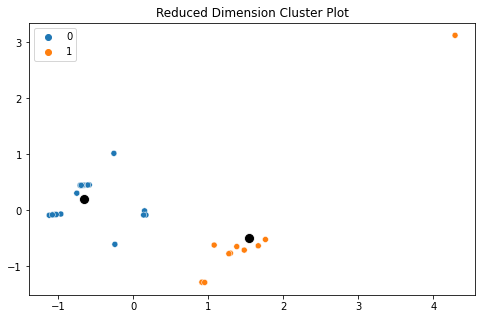

In [37]:
plt.figure(figsize = (8, 5))
ax = sns.scatterplot(
    x = comps[:,0],
    y = comps[:,1],
    hue= clf.labels_,
)
ax = sns.scatterplot(
    x = clf.cluster_centers_[:,0],
    y = clf.cluster_centers_[:,1],
    color  = 'black',
    s= 100,
    palette = ['black']
)
ax.set_title("Reduced Dimension Cluster Plot")
ax

# Tracking how good accuracy is

In [3]:
import pandas as pd
from ClusteringNLP import Clustering_NLP
pd.set_option('display.max_columns', None)
import sentence_to_feature as stfu
import os
directory = "../data/feature_sets/"
datasets = {'name': [], 'data': [], 'doc': []}
for filename in os.listdir(directory):
    if filename[-4:] == '.csv':
        if filename[-8:-5] == 'dat':
            datasets['data'].append(pd.read_csv(directory + filename))
            datasets['name'].append(filename[:-8])
        else:
            datasets['doc'].append(pd.read_csv(directory + filename))


In [23]:
datasets['doc'][0]

,student_answer,teacher_answer,label,question_id,q_answer,q_stopwords,q_stemmed,q_stem_ordered,cluster
0,Because they are repelling each other always.,Like poles repel and opposite poles attract.,0,0,Because they are repelling each other always.,repelling,repel,repel,0
1,The magnets are not touching because they cann...,Like poles repel and opposite poles attract.,1,0,Because they are repelling each other always.,magnets touching attract north north south south,magnet touch attract north north south south,attract magnet north north south south touch,0
2,The magnets will maybe not stick because the f...,Like poles repel and opposite poles attract.,0,0,Because they are repelling each other always.,magnets maybe stick force magnets maybe pencil...,magnet mayb stick forc magnet mayb pencil long...,feel forc long magnet magnet magnet magnet may...,0
3,They are repelling.,Like poles repel and opposite poles attract.,0,0,Because they are repelling each other always.,repelling,repel,repel,0
4,The magnets are on the side when they repel ea...,Like poles repel and opposite poles attract.,0,0,Because they are repelling each other always.,magnets repel,magnet repel,magnet repel,0
5,They are on the same side.,Like poles repel and opposite poles attract.,0,0,Because they are repelling each other always.,NaN,NaN,NaN,0
6,The rings do not touch each other because the ...,Like poles repel and opposite poles attract.,0,0,Because they are repelling each other always.,rings touch magnets facing positive negative,ring touch magnet face posit neg,face magnet neg posit ring touch,0
7,They do not touch each other because one side ...,Like poles repel and opposite poles attract.,0,0,Because they are repelling each other always.,touch magnet force stick force,touch magnet forc stick forc,forc forc magnet stick touch,0
8,The magnets do not touch each other because ei...,Like poles repel and opposite poles attract.,0,0,Because they are repelling each other always.,magnets touch north north sides facing south s...,magnet touch north north side face south south...,face face magnet north north side side south s...,0
9,The rings do not touch each other because the ...,Like poles repel and opposite poles attract.,1,0,Because they are repelling each other always.,rings touch rings magnets repel 2 south north ...,ring touch ring magnet repel 2 south north face,2 face magnet north repel ring ring south touch,0


In [20]:
scores = pd.DataFrame(columns = ['dataset', 'score'])

i = 0
row = {}
for name in datasets['name']:
    row['dataset'] = name
    nlp = Clustering_NLP(datasets['data'][i], datasets['doc'][i])
    nlp.correct_cluster_labels()
    row['score'] = nlp.accuracy()
    i+=1
    scores = scores.append(row, ignore_index = True)

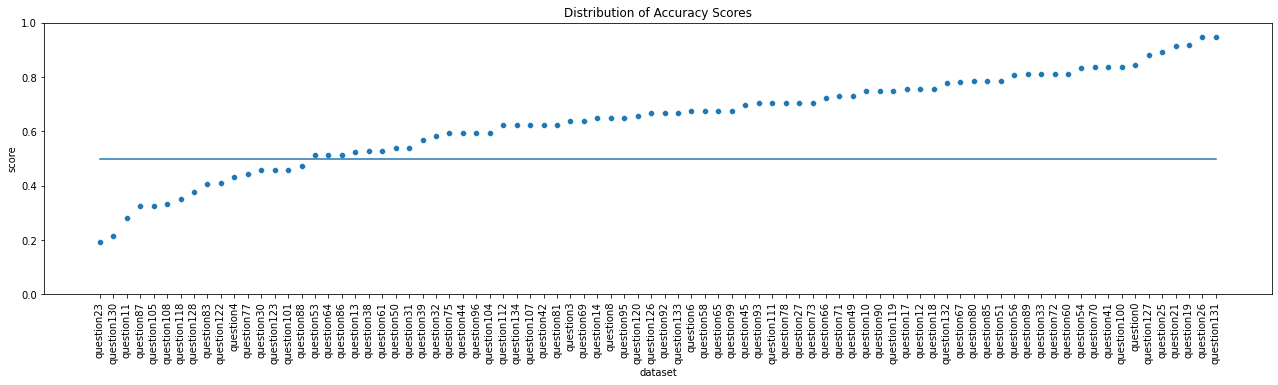

In [21]:
plt.figure(figsize = (22,5))
sns.scatterplot(
    data = scores.sort_values(by = 'score'),
    x = 'dataset',
    y = 'score'
)
sns.lineplot(
    x = scores.dataset,
    y = 0.5,
    
)
plt.xticks(rotation = 90)
plt.ylim(0,1)
plt.title('Distribution of Accuracy Scores')
plt.show()

In [87]:
(scores.score > scores.score.mean()).sum()

45

In [88]:
(scores.score < scores.score.mean()).sum()

39